# KPMG Virtual Program

This notebook is for Module 1 of the KPMG Virtual Program.
It explores the datasets provided by the client, and identifies any data quality concerns.

-------------

## Data Understanding

In this section, we 
- observe the statistics of each dataset and identify inaccurate data
- look for missing values
- compare datasets to find any discrepancies
- plot all variables in each dataset to see any irregular distributions in data

In [1]:
import pandas as pd

xls = pd.ExcelFile('KPMG_VI_New_raw_data_update_final_WIP.xlsx')
trans_df = pd.read_excel(xls, 'Transactions')
newcust_df = pd.read_excel(xls, 'NewCustomerList')
demo_df = pd.read_excel(xls, 'CustomerDemographic')
address_df = pd.read_excel(xls, 'CustomerAddress')

In [2]:
print(trans_df.shape)
trans_df.head()

(20000, 13)


,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
0,1,2,2950,2017-02-25,0.0,Approved,Solex,Standard,medium,medium,71.49,53.62,41245.0
1,2,3,3120,2017-05-21,1.0,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,41701.0
2,3,37,402,2017-10-16,0.0,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,36361.0
3,4,88,3135,2017-08-31,0.0,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.10,36145.0
4,5,78,787,2017-10-01,1.0,Approved,Giant Bicycles,Standard,medium,large,1765.30,709.48,42226.0


In [3]:
print(newcust_df.shape)
newcust_df.head()

(1000, 23)


,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,...,state,country,property_valuation,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Rank,Value
0,Chickie,Brister,Male,86,1957-07-12,General Manager,Manufacturing,Mass Customer,N,Yes,...,QLD,Australia,6,0.41,0.5125,0.640625,0.544531,1,1,1.718750
1,Morly,Genery,Male,69,1970-03-22,Structural Engineer,Property,Mass Customer,N,No,...,NSW,Australia,11,0.52,0.5200,0.650000,0.552500,1,1,1.718750
2,Ardelis,Forrester,Female,10,1974-08-28,Senior Cost Accountant,Financial Services,Affluent Customer,N,No,...,VIC,Australia,5,1.01,1.0100,1.010000,1.010000,1,1,1.718750
3,Lucine,Stutt,Female,64,1979-01-28,Account Representative III,Manufacturing,Affluent Customer,N,Yes,...,QLD,Australia,1,0.98,1.2250,1.225000,1.225000,4,4,1.703125
4,Melinda,Hadlee,Female,34,1965-09-21,Financial Analyst,Financial Services,Affluent Customer,N,No,...,NSW,Australia,9,1.03,1.0300,1.287500,1.287500,4,4,1.703125


In [4]:
print(demo_df.shape)
demo_df.head()

(4000, 13)


,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,default,owns_car,tenure
0,34,Jephthah,Bachmann,U,59,1843-12-21,Legal Assistant,IT,Affluent Customer,N,NaN,No,20.0
1,720,Darrel,Canet,Male,67,1931-10-23,Recruiting Manager,Retail,Affluent Customer,N,1;DROP TABLE users,No,6.0
2,1092,Katlin,Creddon,Female,56,1935-08-22,VP Quality Control,Retail,Mass Customer,N,ì¬íê³¼íì ì´íì°êµ¬ì,No,5.0
3,3410,Merrili,Brittin,Female,93,1940-09-22,NaN,Property,Mass Customer,N,á,No,16.0
4,2413,Abbey,Murrow,Male,27,1943-08-11,Environmental Specialist,Manufacturing,High Net Worth,N,á,Yes,17.0


In [5]:
print(address_df.shape)
address_df.head()

(3999, 6)


,customer_id,address,postcode,state,country,property_valuation
0,1,060 Morning Avenue,2016,New South Wales,Australia,10
1,2,6 Meadow Vale Court,2153,New South Wales,Australia,10
2,4,0 Holy Cross Court,4211,QLD,Australia,9
3,5,17979 Del Mar Point,2448,New South Wales,Australia,4
4,6,9 Oakridge Court,3216,VIC,Australia,9


In [6]:
trans_df.describe()

,transaction_id,product_id,customer_id,online_order,list_price,standard_cost,product_first_sold_date
count,20000.000000,20000.00000,20000.000000,19640.000000,20000.000000,19803.000000,19803.000000
mean,10000.500000,45.36465,1738.246050,0.500458,1107.829449,556.046951,38199.776549
std,5773.647028,30.75359,1011.951046,0.500013,582.825242,405.955660,2875.201110
min,1.000000,0.00000,1.000000,0.000000,12.010000,7.210000,33259.000000
25%,5000.750000,18.00000,857.750000,0.000000,575.270000,215.140000,35667.000000
50%,10000.500000,44.00000,1736.000000,1.000000,1163.890000,507.580000,38216.000000
75%,15000.250000,72.00000,2613.000000,1.000000,1635.300000,795.100000,40672.000000
max,20000.000000,100.00000,5034.000000,1.000000,2091.470000,1759.850000,42710.000000


In [7]:
newcust_df.describe()

,past_3_years_bike_related_purchases,tenure,postcode,property_valuation,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Rank,Value
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,49.836000,11.388000,3019.227000,7.397000,0.748970,0.841435,0.944917,0.872869,498.819000,498.819000,0.881714
std,27.796686,5.037145,848.895767,2.758804,0.202517,0.247584,0.291078,0.279308,288.810997,288.810997,0.293525
min,0.000000,0.000000,2000.000000,1.000000,0.400000,0.400000,0.400000,0.340000,1.000000,1.000000,0.340000
25%,26.750000,7.000000,2209.000000,6.000000,0.580000,0.637500,0.719688,0.653375,250.000000,250.000000,0.649531
50%,51.000000,11.000000,2800.000000,8.000000,0.740000,0.830000,0.925000,0.850000,500.000000,500.000000,0.860000
75%,72.000000,15.000000,3845.500000,9.000000,0.930000,1.014375,1.162500,1.062500,750.250000,750.250000,1.075000
max,99.000000,22.000000,4879.000000,12.000000,1.100000,1.375000,1.718750,1.718750,1000.000000,1000.000000,1.718750


In [8]:
demo_df.describe()

,customer_id,past_3_years_bike_related_purchases,tenure
count,4000.000000,4000.000000,3913.000000
mean,2000.500000,48.890000,10.657041
std,1154.844867,28.715005,5.660146
min,1.000000,0.000000,1.000000
25%,1000.750000,24.000000,6.000000
50%,2000.500000,48.000000,11.000000
75%,3000.250000,73.000000,15.000000
max,4000.000000,99.000000,22.000000


In [9]:
address_df.describe()

,customer_id,postcode,property_valuation
count,3999.000000,3999.000000,3999.000000
mean,2003.987997,2985.755939,7.514379
std,1154.576912,844.878364,2.824663
min,1.000000,2000.000000,1.000000
25%,1004.500000,2200.000000,6.000000
50%,2004.000000,2768.000000,8.000000
75%,3003.500000,3750.000000,10.000000
max,4003.000000,4883.000000,12.000000


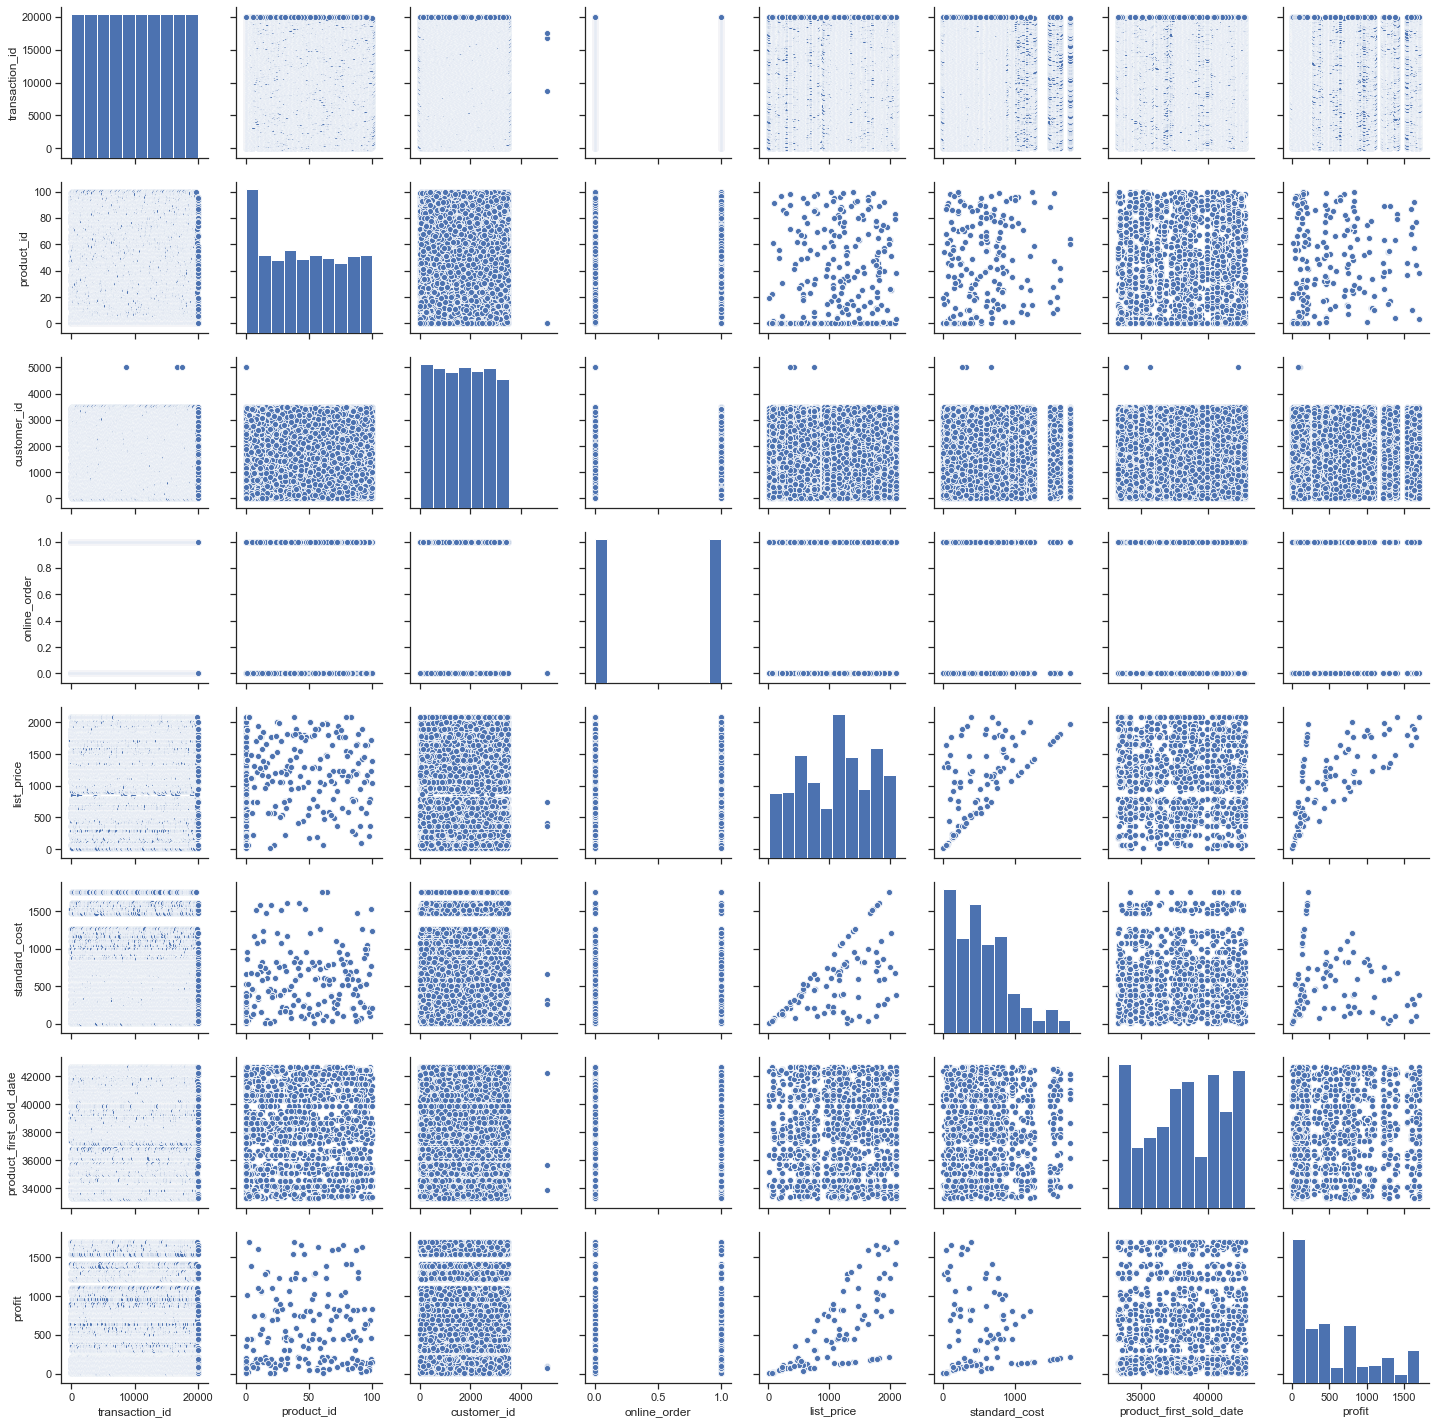

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="ticks")

sns.pairplot(trans_df)
plt.savefig('trans_pariplot.png')

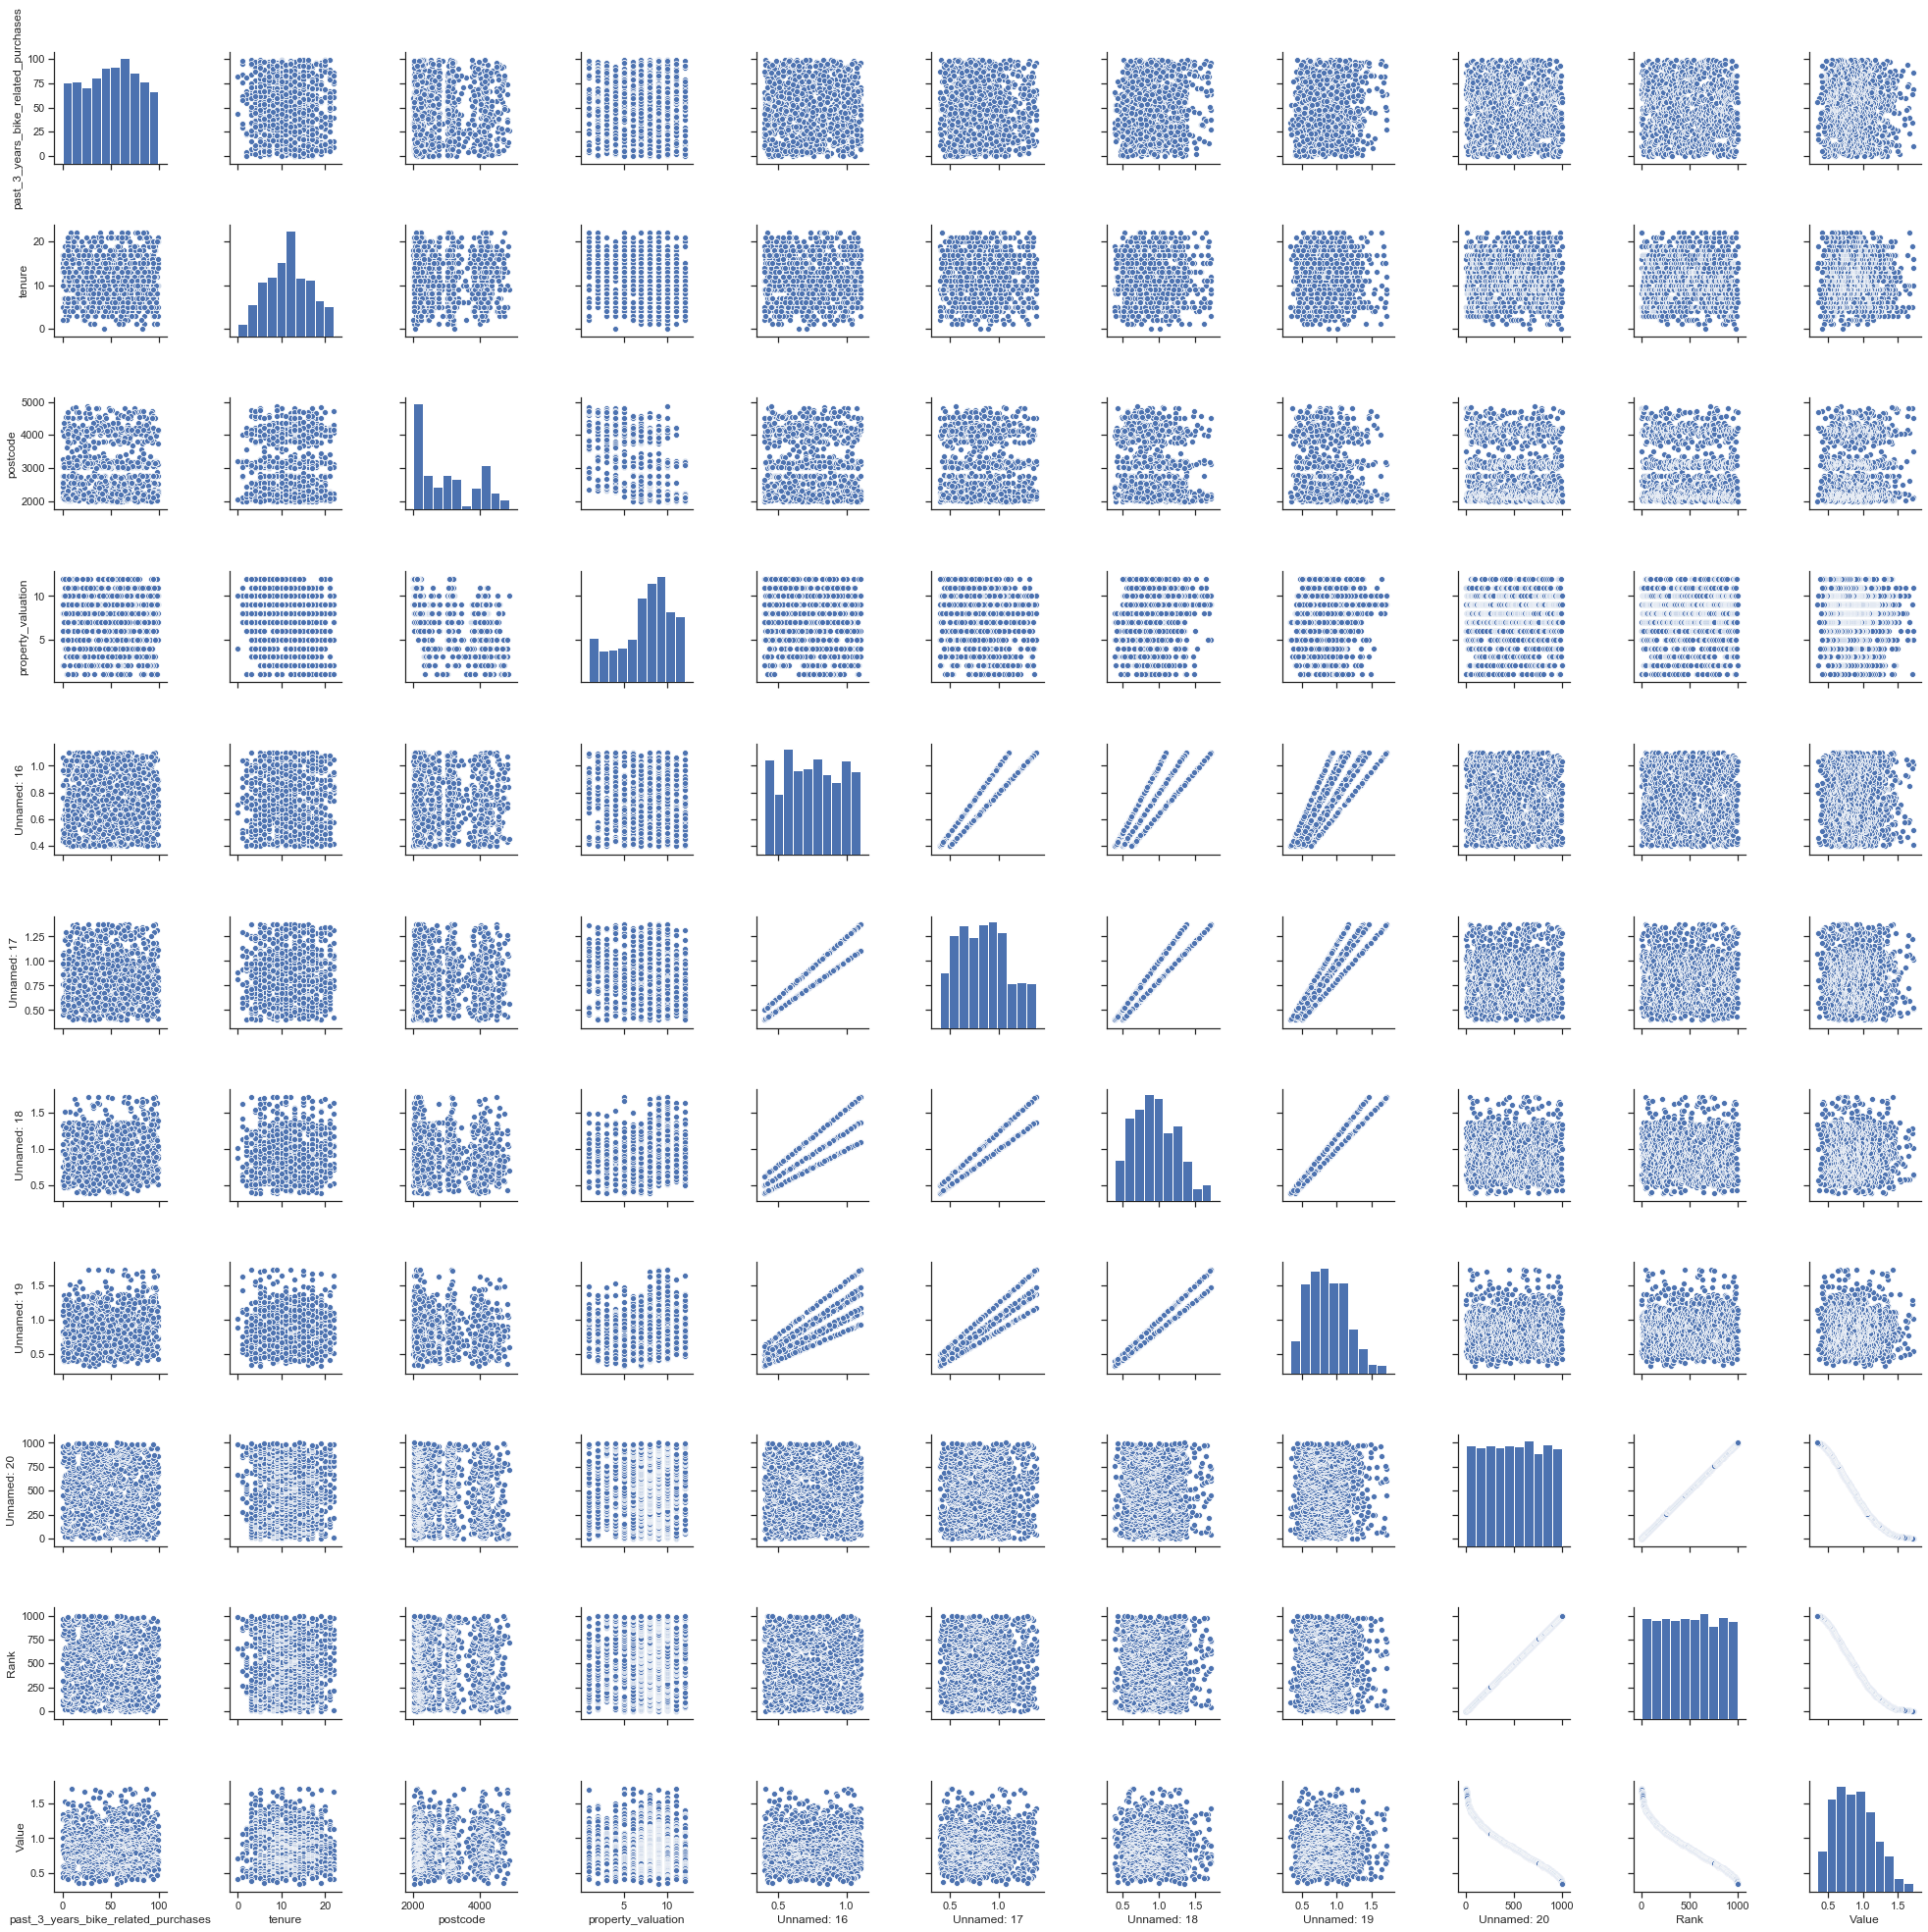

In [11]:
sns.set(style="ticks")

sns.pairplot(newcust_df)
plt.savefig('newcust_pariplot.png')

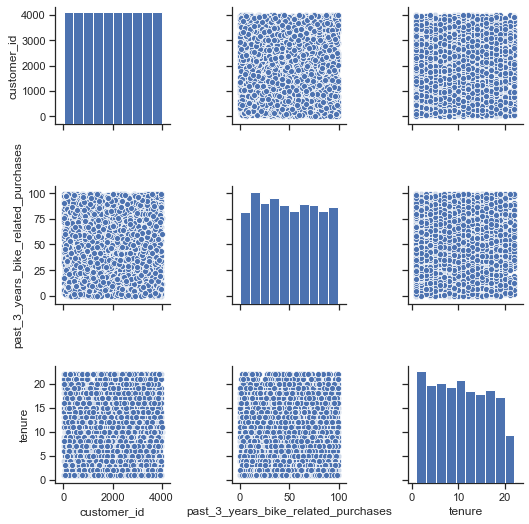

In [12]:
sns.set(style="ticks")

sns.pairplot(demo_df)
plt.savefig('demo_pariplot.png')

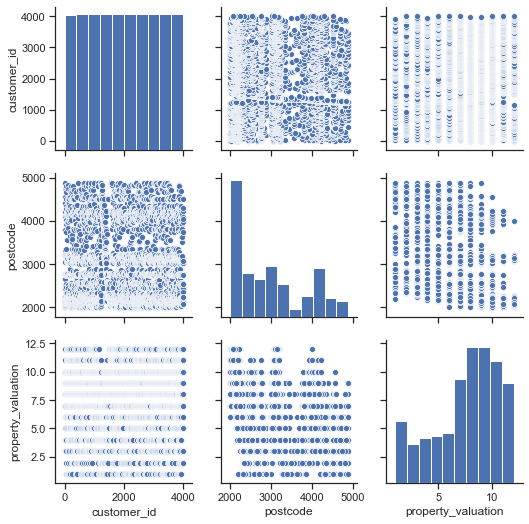

In [13]:
sns.set(style="ticks")

sns.pairplot(address_df)
plt.savefig('address_pariplot.png')

## Variable Transformation

In this section, we validate DOB, tenure, and price values.

In [14]:
#Check if there is any negative profit sales
trans_df['profit'] = trans_df.list_price -trans_df.standard_cost
trans_df.describe()

,transaction_id,product_id,customer_id,online_order,list_price,standard_cost,product_first_sold_date,profit
count,20000.000000,20000.00000,20000.000000,19640.000000,20000.000000,19803.000000,19803.000000,19803.000000
mean,10000.500000,45.36465,1738.246050,0.500458,1107.829449,556.046951,38199.776549,551.950915
std,5773.647028,30.75359,1011.951046,0.500013,582.825242,405.955660,2875.201110,493.412849
min,1.000000,0.00000,1.000000,0.000000,12.010000,7.210000,33259.000000,4.800000
25%,5000.750000,18.00000,857.750000,0.000000,575.270000,215.140000,35667.000000,133.780000
50%,10000.500000,44.00000,1736.000000,1.000000,1163.890000,507.580000,38216.000000,445.210000
75%,15000.250000,72.00000,2613.000000,1.000000,1635.300000,795.100000,40672.000000,830.240000
max,20000.000000,100.00000,5034.000000,1.000000,2091.470000,1759.850000,42710.000000,1702.550000


In [15]:
#check if customer's age is accurate
import numpy as np
newcust_df['age'] = (np.datetime64('2020-01-01', 'D') - newcust_df.DOB)
newcust_df['age'] = newcust_df['age'] / np.timedelta64(1, 'D')
newcust_df['age'] = newcust_df['age'] / 365
newcust_df.describe()

,past_3_years_bike_related_purchases,tenure,postcode,property_valuation,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Rank,Value,age
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,983.000000
mean,49.836000,11.388000,3019.227000,7.397000,0.748970,0.841435,0.944917,0.872869,498.819000,498.819000,0.881714,48.732638
std,27.796686,5.037145,848.895767,2.758804,0.202517,0.247584,0.291078,0.279308,288.810997,288.810997,0.293525,17.077407
min,0.000000,0.000000,2000.000000,1.000000,0.400000,0.400000,0.400000,0.340000,1.000000,1.000000,0.340000,17.854795
25%,26.750000,7.000000,2209.000000,6.000000,0.580000,0.637500,0.719688,0.653375,250.000000,250.000000,0.649531,36.746575
50%,51.000000,11.000000,2800.000000,8.000000,0.740000,0.830000,0.925000,0.850000,500.000000,500.000000,0.860000,47.805479
75%,72.000000,15.000000,3845.500000,9.000000,0.930000,1.014375,1.162500,1.062500,750.250000,750.250000,1.075000,62.271233
max,99.000000,22.000000,4879.000000,12.000000,1.100000,1.375000,1.718750,1.718750,1000.000000,1000.000000,1.718750,81.621918


In [16]:
#Check if csutomer's age is accurate
demo_df['age'] = (np.datetime64('2020-01-01', 'D') - demo_df.DOB)
demo_df['age'] = demo_df['age'] / np.timedelta64(1, 'D')
demo_df['age'] = demo_df['age'] / 365
demo_df.describe()

,customer_id,past_3_years_bike_related_purchases,tenure,age
count,4000.000000,4000.000000,3913.000000,3913.000000
mean,2000.500000,48.890000,10.657041,42.498636
std,1154.844867,28.715005,5.660146,12.804141
min,1.000000,0.000000,1.000000,17.821918
25%,1000.750000,24.000000,6.000000,32.863014
50%,2000.500000,48.000000,11.000000,42.473973
75%,3000.250000,73.000000,15.000000,51.978082
max,4000.000000,99.000000,22.000000,176.147945


In [17]:
#List the ouliers in customer's age
demo_df[demo_df.age > 100]

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,default,owns_car,tenure,age
0,34,Jephthah,Bachmann,U,59,1843-12-21,Legal Assistant,IT,Affluent Customer,N,NaN,No,20.0,176.147945


In [18]:
#Check if there's any observation where tenure is larger than customer age
demo_df[demo_df.age < demo_df.tenure]

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,default,owns_car,tenure,age


In [19]:
#Check if there's any observation where tenure is larger than customer age
newcust_df[newcust_df.age < newcust_df.tenure]

,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,...,country,property_valuation,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Rank,Value,age
